In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/word2vec-embedding-using-gensim-and-nltk/__results__.html
/kaggle/input/word2vec-embedding-using-gensim-and-nltk/__output__.json
/kaggle/input/word2vec-embedding-using-gensim-and-nltk/brown.embedding
/kaggle/input/word2vec-embedding-using-gensim-and-nltk/custom.css
/kaggle/input/word2vec-embedding-using-gensim-and-nltk/__results___files/__results___

## Import Libraries

In [188]:
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
from nltk import word_tokenize
from sklearn.metrics import classification_report

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

## Data Input

In [189]:
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [190]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [191]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [192]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [193]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [194]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


# Sampling and data spilt

In [195]:
df = df.groupby('sentiment').apply(lambda x: x.sample(frac=0.05,random_state=20))
df = df.droplevel('sentiment')
df = df.reset_index()
df = df.drop(['index'],axis = 1)
df

,sentiment,text
0,Negative,my wrist is sprained thanxs to mitchell myles
1,Negative,@Sam_Bartlett i'm going to be so upset if i ge...
2,Negative,dinner with tome.. then studying all night
3,Negative,@Zarinah I'm not ignoring you!!!! I'm listeni...
4,Negative,Ahhhh always spilling coffee
...,...,...
79995,Positive,"@barrylandy Took me a while, but I got it even..."
79996,Positive,"@ColtonG hi bb bro, I hope u wake up n find ti..."
79997,Positive,just got a reply from Mark Kanemure (SYTYCD) o...
79998,Positive,@izzaluvsmusic ryt...who would resist that esp...


# Normalize

In [196]:
'''
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
'''

'\nword_cloud_text = \'\'.join(train_data[train_data["sentiment"]=="Positive"].lower)\n#Creation of wordcloud\nwordcloud = WordCloud(\n    max_font_size=100,\n    max_words=100,\n    background_color="black",\n    scale=10,\n    width=800,\n    height=800\n).generate(word_cloud_text)\n#Figure properties\nplt.figure(figsize=(10,10))\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis("off")\nplt.show()\n'

In [197]:
'''
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
'''

'\nword_cloud_text = \'\'.join(train_data[train_data["sentiment"]=="Negative"].lower)\n#Creation of wordcloud\nwordcloud = WordCloud(\n    max_font_size=100,\n    max_words=100,\n    background_color="black",\n    scale=10,\n    width=800,\n    height=800\n).generate(word_cloud_text)\n#Figure properties\nplt.figure(figsize=(10,10))\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis("off")\nplt.show()\n'

# Tokenize

In [198]:
import spacy
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")

In [199]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


In [200]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [201]:
from sklearn.model_selection import train_test_split

X, y = df['text'].values, df['sentiment'].values

# Split the data into train and test sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Split the train set into train and validation sets (50% train, 15% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15/0.85, stratify=y_train, random_state=42)

print(f'Shape of train data: {x_train.shape}')
print(f'Shape of validation data: {x_val.shape}')
print(f'Shape of test data: {x_test.shape}')


Shape of train data: (56000,)
Shape of validation data: (12000,)
Shape of test data: (12000,)


In [202]:

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_string(s):
    # Convert to lower case
    s = s.lower()
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Remove digits
    s = re.sub(r"\d", '', s)
    # Lemmatization
    # Remove punctuation
    s = re.sub(r"[^\w\s]", '', s)

    return s


def tockenize(x_train, y_train, x_val, y_val, x_test, y_test):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:2000]
    # creating a dict
    onehot_dict = {w: i + 1 for i, w in enumerate(corpus_)}

    # tokenize train data
    final_list_train = []
    for sent in x_train:
        final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                 if preprocess_string(word) in onehot_dict.keys()])

    # tokenize validation data
    final_list_val = []
    for sent in x_val:
        final_list_val.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                               if preprocess_string(word) in onehot_dict.keys()])

    # tokenize test data
    final_list_test = []
    for sent in x_test:
        final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                if preprocess_string(word) in onehot_dict.keys()])

    encoded_train = [1 if label == 'Positive' else 0 for label in y_train]
    encoded_val = [1 if label == 'Positive' else 0 for label in y_val]
    encoded_test = [1 if label == 'Positive' else 0 for label in y_test]

    return (
        np.array(final_list_train), np.array(encoded_train),
        np.array(final_list_val), np.array(encoded_val),
        np.array(final_list_test), np.array(encoded_test),
        onehot_dict
    )


In [203]:
x_train

array(["@absolutelybatty *HUGS BACK* Thanks hon.  I can't believe he's gone! ",
       "2 days until Ubuntu 9.04 is released! I CAN'T WAIT! ",
       "@GeorgeWBRU Yup, just un-indented your paragraphs...hope you don't mind.  Nice work!",
       ...,
       'On vaication in my cottage with TENNA! yeah her from tp show  So proud !',
       '@drewlovesmiley I wished I could have been the first one to review.  ',
       'great time tonight at the Mini-UP with @theupexperience @cwelsh @gracerodriguez @anjuan @rotkapchen. No wi-fi @ Houston United Way  #UP09'],
      dtype=object)

In [204]:
x_train,y_train,x_val,y_val,x_test,y_test,vocab = tockenize(x_train,y_train,x_val,y_val, x_test, y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [205]:
x_train

array([list([662, 15, 26, 12, 298, 188, 253]), list([71, 12, 67]),
       list([922, 7, 404, 65, 11]), ..., list([62, 93, 757]),
       list([73, 88, 18, 1238]), list([37, 14, 58, 1755, 60])],
      dtype=object)

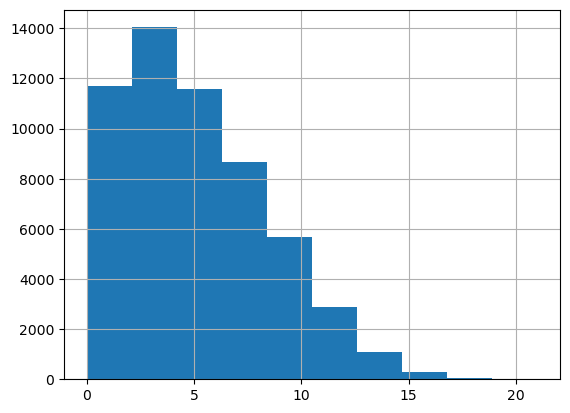

count    56000.000000
mean         5.366714
std          3.244527
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         21.000000
dtype: float64

In [206]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.savefig('sentences_lenght.jpg')
plt.show()
pd.Series(rev_len).describe()


In [207]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [208]:
#we have very less number of reviews with length > 500.
#So we will consideronly those below it.
x_train_pad = padding_(x_train,20)
x_val_pad = padding_(x_val,20)
x_test_pad = padding_(x_test,20)

In [209]:
len(x_train_pad)

56000

In [210]:
x_train_pad

array([[   0,    0,    0, ...,  298,  188,  253],
       [   0,    0,    0, ...,   71,   12,   67],
       [   0,    0,    0, ...,  404,   65,   11],
       ...,
       [   0,    0,    0, ...,   62,   93,  757],
       [   0,    0,    0, ...,   88,   18, 1238],
       [   0,    0,    0, ...,   58, 1755,   60]])

# One hot encodding

In [211]:
one_hot_sentences = np.zeros((len(x_train_pad), 20, max(vocab.values()) + 1))


In [212]:
for i, sentence in enumerate(x_train_pad):
    for j, word_index in enumerate(sentence):
        one_hot_sentences[i, j, word_index] = 1



In [213]:
one_hot_sentences.shape

(56000, 20, 2001)

In [214]:
x_train_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       662,  15,  26,  12, 298, 188, 253])

In [215]:
one_hot_sentences_val = np.zeros((len(x_val_pad), 20, max(vocab.values()) + 1))


In [216]:
for i, sentence in enumerate(x_val_pad):
    for j, word_index in enumerate(sentence):
        one_hot_sentences_val[i, j, word_index] = 1



In [217]:
one_hot_sentences_val.shape

(12000, 20, 2001)

In [218]:
one_hot_sentences_test = np.zeros((len(x_test_pad), 20, max(vocab.values()) + 1))


In [219]:
for i, sentence in enumerate(x_test_pad):
    for j, word_index in enumerate(sentence):
        one_hot_sentences_test[i, j, word_index] = 1



In [220]:
one_hot_sentences_test.shape

(12000, 20, 2001)

# Dataloaders

In [221]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(one_hot_sentences), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(one_hot_sentences_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(one_hot_sentences_test), torch.from_numpy(y_test))

# dataloaders
batch_size = 64

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last = True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last = True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,drop_last = True)


# Word2Vec embedding

In [222]:
def load_word2vec_vectors(w2v_file= '/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt'):
    """Load the glove word vectors"""
    word_vectors = {}
    with open(w2v_file) as f:
        for line in f:
            split = line.split()
            word_vectors[split[0]] = np.array([float(x) for x in split[1:]])
    return word_vectors

In [223]:
def get_emb_matrix(pretrained, word_counts, emb_size = 100):
    """ Creates embedding matrix from word vectors"""
    vocab_size = len(word_counts) + 2
    vocab_to_idx = {}
    vocab = ["", "UNK"]
    W = np.zeros((vocab_size, emb_size), dtype="float32")
    W[0] = np.zeros(emb_size, dtype='float32') # adding a vector for padding
    W[1] = np.random.uniform(-0.25, 0.25, emb_size) # adding a vector for unknown words 
    vocab_to_idx["UNK"] = 1
    i = 2
    for word in word_counts:
        if word in word_vecs:
            W[i] = word_vecs[word]
        else:
            W[i] = np.random.uniform(-0.25,0.25, emb_size)
        vocab_to_idx[word] = i
        vocab.append(word)
        i += 1   
    return W, np.array(vocab), vocab_to_idx

In [224]:
word_vecs = load_word2vec_vectors()
pretrained_weights1, vocab, vocab2index = get_emb_matrix(word_vecs, vocab)

In [225]:
pretrained_weights1 = pretrained_weights1.reshape((pretrained_weights1.shape[0], 100))
pretrained_weights1.shape

(2002, 100)

# RNN - Word2Vec

**Model**

In [226]:
class SentimentRNN_word2vec(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,pretrained_weights,drop_prob=0.5):
        super(SentimentRNN_word2vec,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.pretrained_weights = pretrained_weights
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_weights))
        #self.embedding.weight.requires_grad = False
        
        #lstm
        self.rnn = nn.RNN(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        rnn_out, hidden = self.rnn(embeds)
        
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out
        


In [227]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 100
output_dim = 1
hidden_dim = 150


model_rnn_word2vec = SentimentRNN_word2vec(no_layers,vocab_size,hidden_dim,embedding_dim,pretrained_weights1,drop_prob=0.5)

#moving to gpu
model_rnn_word2vec.to(device)

print(model_rnn_word2vec)

SentimentRNN_word2vec(
  (embedding): Embedding(2003, 100)
  (rnn): RNN(100, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [228]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_rnn_word2vec.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [229]:
# create Tensor datasets
train_data2 = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data2 = TensorDataset(torch.from_numpy(x_val_pad), torch.from_numpy(y_val))
test_data2 = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 64
# make sure to SHUFFLE your data
train_loader2 = DataLoader(train_data2, shuffle=True, batch_size=batch_size,drop_last = True)
valid_loader2 = DataLoader(valid_data2, shuffle=True, batch_size=batch_size,drop_last = True)
test_loader2 = DataLoader(test_data2, shuffle=True, batch_size=batch_size,drop_last = True)

**Training**

In [230]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_rnn_word2vec.train()
    # initialize hidden state 
    for inputs, labels in train_loader2:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        #h = tuple([each.data for each in h])
        
        model_rnn_word2vec.zero_grad()
        output = model_rnn_word2vec(inputs)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_rnn_word2vec.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader2:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        model_rnn_word2vec.zero_grad()
        y_pred = model_rnn_word2vec(inputs)


    val_losses = []
    val_acc = 0.0
    model_rnn_word2vec.eval()
    for inputs, labels in valid_loader2:

            inputs, labels = inputs.to(device), labels.to(device)

            output = model_rnn_word2vec(inputs)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader2.dataset)
    epoch_val_acc = val_acc/len(valid_loader2.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_rnn_word2vec.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.637789402450834 val_loss : 0.5656233538280834
train_accuracy : 62.30178571428572 val_accuracy : 70.55833333333334
Validation loss decreased (inf --> 0.565623).  Saving model ...
Epoch 2
train_loss : 0.537953948191234 val_loss : 0.5343671998875664
train_accuracy : 72.77321428571429 val_accuracy : 73.25833333333334
Validation loss decreased (0.565623 --> 0.534367).  Saving model ...
Epoch 3
train_loss : 0.509543566261019 val_loss : 0.5226964078803751
train_accuracy : 75.03214285714286 val_accuracy : 74.04166666666666
Validation loss decreased (0.534367 --> 0.522696).  Saving model ...
Epoch 4
train_loss : 0.49682683174950737 val_loss : 0.5148246575166835
train_accuracy : 76.01964285714286 val_accuracy : 74.65
Validation loss decreased (0.522696 --> 0.514825).  Saving model ...
Epoch 5
train_loss : 0.49124183440208435 val_loss : 0.5192670163942531
train_accuracy : 76.47142857142856 val_accuracy : 74.53333333333333
Epoch 6
train_loss : 0.4853957755565643 val_loss : 0

**Plot**

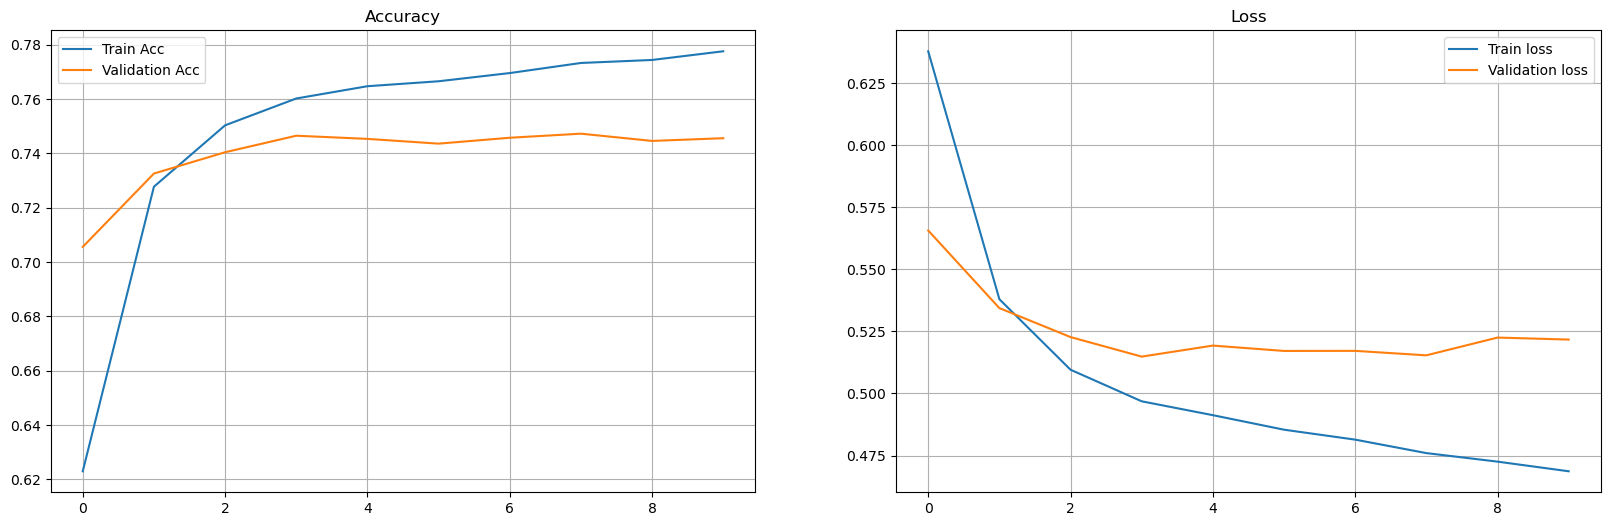

<Figure size 640x480 with 0 Axes>

In [231]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.show()
plt.savefig('RNN_w2v_loss_acc.png')



**Confusion Matrix**

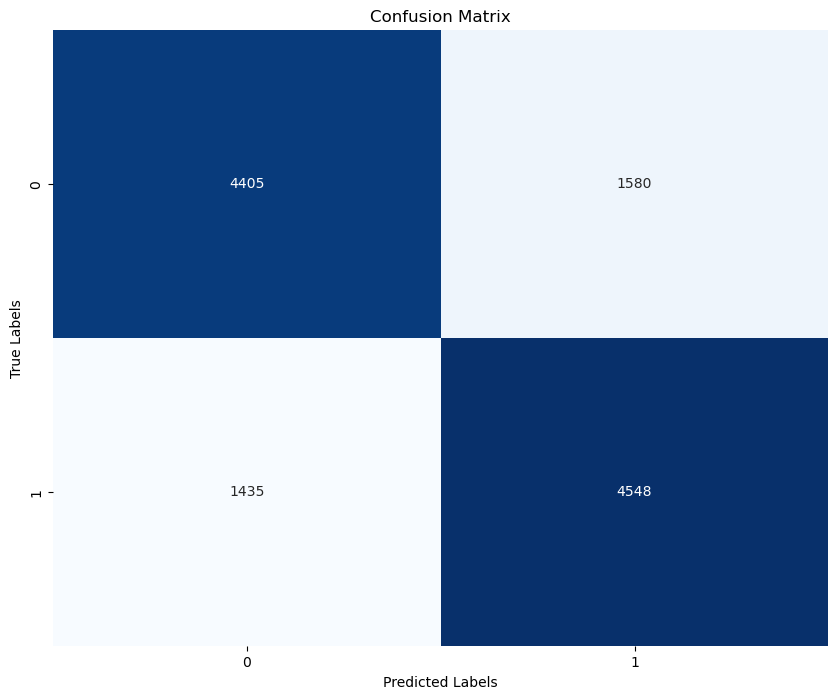

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_rnn_word2vec.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader2:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model_rnn_word2vec(inputs)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('RNN_w2v_confusion.png')
plt.show()


**Classification Report**

In [233]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5985
           1       0.74      0.76      0.75      5983

    accuracy                           0.75     11968
   macro avg       0.75      0.75      0.75     11968
weighted avg       0.75      0.75      0.75     11968



## RNN - one hot encoding

**model**

In [234]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        
        #lstm
        self.linear = nn.Linear(vocab_size, embedding_dim)
        #self.linear = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x):
        batch_size = x.size(0)
        #print(x.type)
        x = x.to(self.linear.weight.dtype)
        #print(x.type)
        #print('x-shape: ',x.shape)
        #print('vocab-s: ',self.vocab_size)
        # embeddings and lstm_out
        embeds = self.linear(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        rnn_out, hidden = self.rnn(embeds)
        
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out
        


In [235]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 150
output_dim = 1
hidden_dim = 150


model_rnn = SentimentRNN(no_layers,vocab_size-2,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model_rnn.to(device)

print(model_rnn)

SentimentRNN(
  (linear): Linear(in_features=2001, out_features=150, bias=True)
  (rnn): RNN(150, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [236]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_rnn.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [237]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_rnn.train()
    # initialize hidden state 
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        #h = tuple([each.data for each in h])
        
        model_rnn.zero_grad()
        output = model_rnn(inputs)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_rnn.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        model_rnn.zero_grad()
        y_pred = model_rnn(inputs)


    val_losses = []
    val_acc = 0.0
    model_rnn.eval()
    for inputs, labels in valid_loader:

            inputs, labels = inputs.to(device), labels.to(device)

            output = model_rnn(inputs)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_rnn.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.5625984258651734 val_loss : 0.5225117678310782
train_accuracy : 69.8892857142857 val_accuracy : 73.85833333333333
Validation loss decreased (inf --> 0.522512).  Saving model ...
Epoch 2
train_loss : 0.5011716247626713 val_loss : 0.5116039742441738
train_accuracy : 75.44285714285715 val_accuracy : 74.81666666666666
Validation loss decreased (0.522512 --> 0.511604).  Saving model ...
Epoch 3
train_loss : 0.48716145505223957 val_loss : 0.517259877314542
train_accuracy : 76.51964285714286 val_accuracy : 74.425
Epoch 4
train_loss : 0.4711830738271986 val_loss : 0.5243333762979763
train_accuracy : 77.53750000000001 val_accuracy : 74.26666666666667
Epoch 5
train_loss : 0.45421743038722445 val_loss : 0.537038148246347
train_accuracy : 78.53571428571429 val_accuracy : 73.375
Epoch 6
train_loss : 0.4424754580259323 val_loss : 0.5457286900058788
train_accuracy : 79.40714285714286 val_accuracy : 73.925
Epoch 7
train_loss : 0.4292999541759491 val_loss : 0.5584687920496425
tra

**Plot**

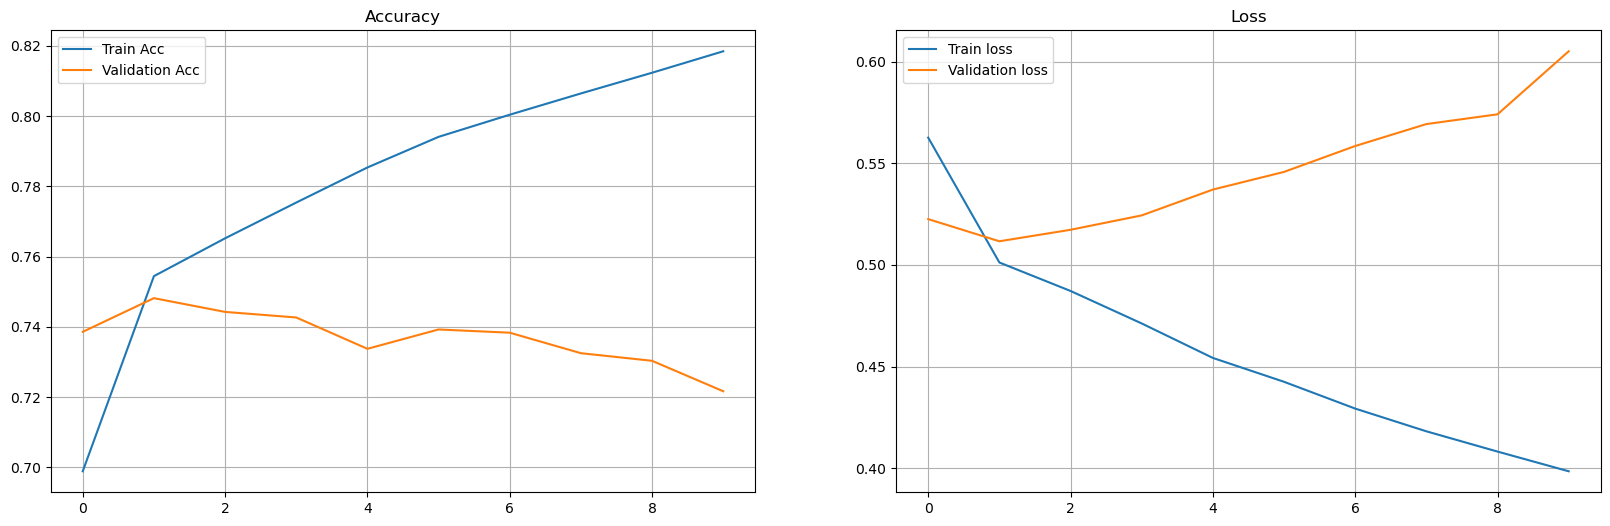

In [238]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('RNN_onehot_loss_acc.png')
plt.show()


**Confusion matrix**

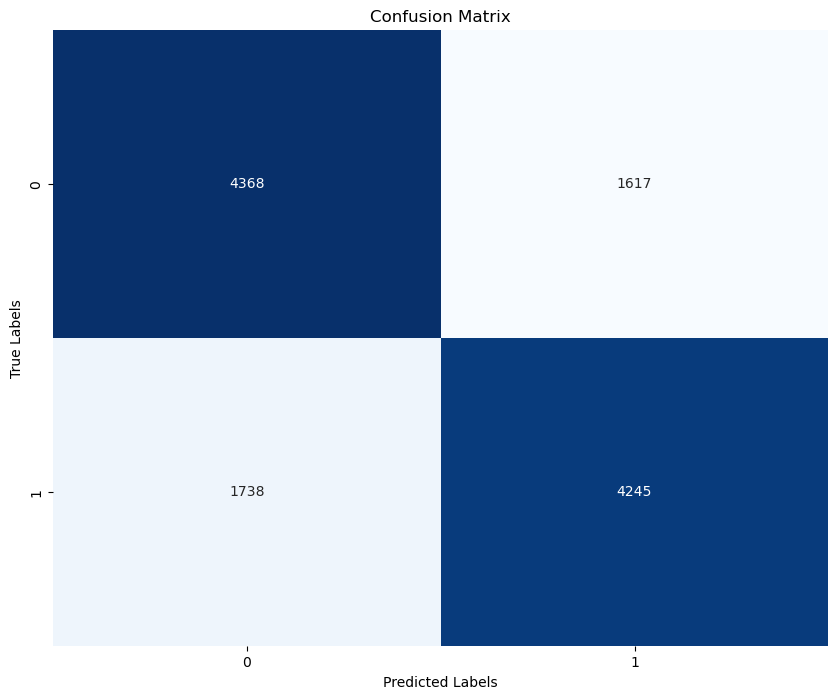

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_rnn.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model_rnn(inputs)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('RNN_onehot_confusion.png')
plt.show()


**Classification Report**

In [240]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5985
           1       0.72      0.71      0.72      5983

    accuracy                           0.72     11968
   macro avg       0.72      0.72      0.72     11968
weighted avg       0.72      0.72      0.72     11968



## Glove embedding

In [241]:
def load_glove_vectors(glove_file= '/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt'):
    """Load the glove word vectors"""
    word_vectors = {}
    with open(glove_file) as f:
        for line in f:
            split = line.split()
            word_vectors[split[0]] = np.array([float(x) for x in split[1:]])
    return word_vectors

In [242]:
def get_emb_matrix(pretrained, word_counts, emb_size = 100):
    """ Creates embedding matrix from word vectors"""
    vocab_size = len(word_counts) + 2
    vocab_to_idx = {}
    vocab = ["", "UNK"]
    W = np.zeros((vocab_size, emb_size), dtype="float32")
    W[0] = np.zeros(emb_size, dtype='float32') # adding a vector for padding
    W[1] = np.random.uniform(-0.25, 0.25, emb_size) # adding a vector for unknown words 
    vocab_to_idx["UNK"] = 1
    i = 2
    for word in word_counts:
        if word in word_vecs:
            W[i] = word_vecs[word]
        else:
            W[i] = np.random.uniform(-0.25,0.25, emb_size)
        vocab_to_idx[word] = i
        vocab.append(word)
        i += 1   
    return W, np.array(vocab), vocab_to_idx

In [243]:
word_vecs = load_glove_vectors()
pretrained_weights, vocab, vocab2index = get_emb_matrix(word_vecs, vocab)

In [244]:
pretrained_weights.shape

(2004, 100)

In [245]:
pretrained_weights = pretrained_weights.reshape((pretrained_weights.shape[0], 100))
pretrained_weights.shape

(2004, 100)

# RNN - GloVe Embedding

**Model**

In [246]:
class SentimentRNN_glove(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,pretrained_weights,drop_prob=0.5):
        super(SentimentRNN_glove,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.pretrained_weights = pretrained_weights
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_weights))
        #self.embedding.weight.requires_grad = False
        
        #lstm
        self.rnn = nn.RNN(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        rnn_out, hidden = self.rnn(embeds)
        
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(rnn_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out
        


In [247]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 100
output_dim = 1
hidden_dim = 150


model_rnn_glove = SentimentRNN_glove(no_layers,vocab_size,hidden_dim,embedding_dim,pretrained_weights,drop_prob=0.5)

#moving to gpu
model_rnn_glove.to(device)

print(model_rnn_glove)

SentimentRNN_glove(
  (embedding): Embedding(2005, 100)
  (rnn): RNN(100, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [248]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_rnn_glove.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [249]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_rnn_glove.train()
    # initialize hidden state 
    for inputs, labels in train_loader2:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        #h = tuple([each.data for each in h])
        
        model_rnn_glove.zero_grad()
        output = model_rnn_glove(inputs)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_rnn_glove.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader2:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        model_rnn_glove.zero_grad()
        y_pred = model_rnn_glove(inputs)


    val_losses = []
    val_acc = 0.0
    model_rnn_glove.eval()
    for inputs, labels in valid_loader2:

            inputs, labels = inputs.to(device), labels.to(device)

            output = model_rnn_glove(inputs)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader2.dataset)
    epoch_val_acc = val_acc/len(valid_loader2.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_rnn_glove.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.6395335098334721 val_loss : 0.5712647093808587
train_accuracy : 61.80892857142857 val_accuracy : 70.42500000000001
Validation loss decreased (inf --> 0.571265).  Saving model ...
Epoch 2
train_loss : 0.5395528993947165 val_loss : 0.5321489623523651
train_accuracy : 72.75357142857143 val_accuracy : 73.63333333333333
Validation loss decreased (0.571265 --> 0.532149).  Saving model ...
Epoch 3
train_loss : 0.5073259545053754 val_loss : 0.5157370438231504
train_accuracy : 75.075 val_accuracy : 75.05833333333334
Validation loss decreased (0.532149 --> 0.515737).  Saving model ...
Epoch 4
train_loss : 0.49593151630674087 val_loss : 0.5232401318091122
train_accuracy : 75.75714285714285 val_accuracy : 74.5
Epoch 5
train_loss : 0.488421128988266 val_loss : 0.5174666939572217
train_accuracy : 76.43035714285715 val_accuracy : 74.66666666666667
Epoch 6
train_loss : 0.48398040900911604 val_loss : 0.5191096096115316
train_accuracy : 76.69107142857143 val_accuracy : 74.53333333

**Plot**

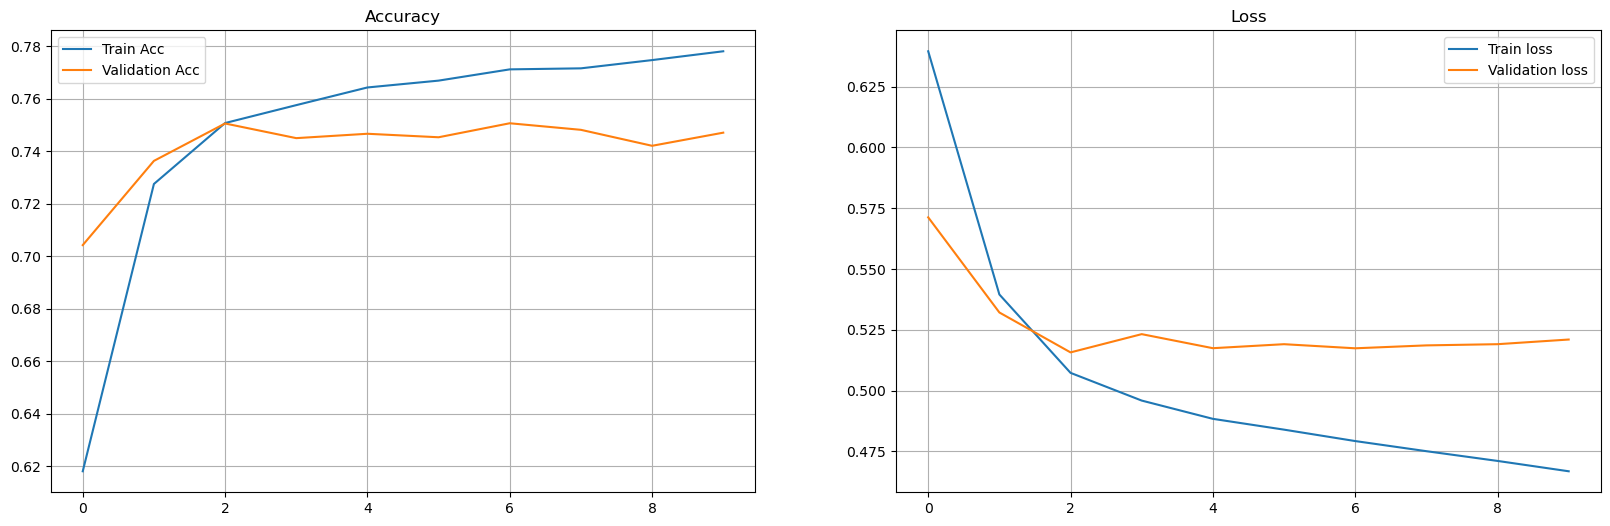

In [250]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('RNN_glove_loss_acc.png')
plt.show()


**Confusion matrix**

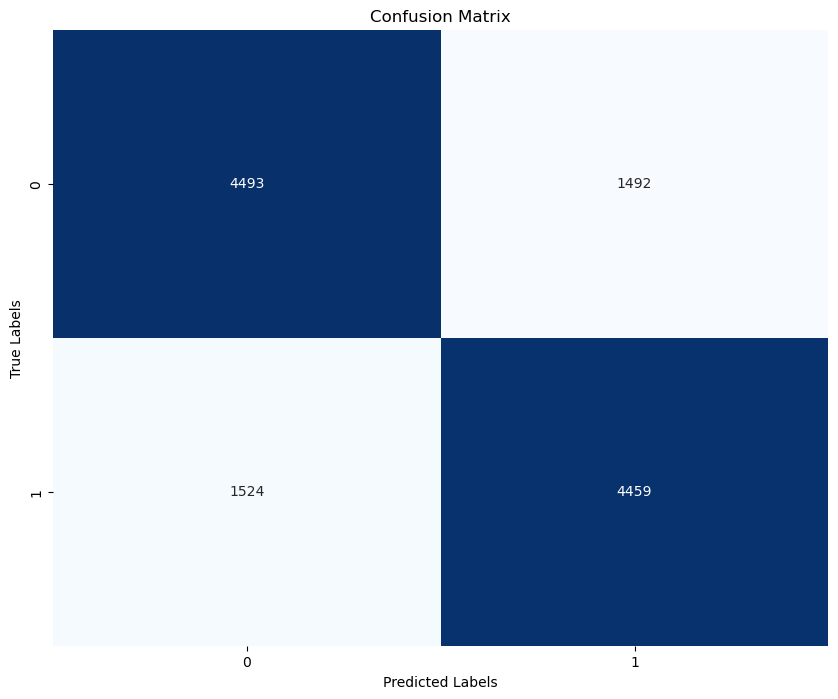

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_rnn_glove.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader2:
        inputs, labels = inputs.to(device), labels.to(device)
        output = model_rnn_glove(inputs)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('RNN_glove_conf.png')
plt.show()


**Classification Report**

In [252]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5985
           1       0.75      0.75      0.75      5983

    accuracy                           0.75     11968
   macro avg       0.75      0.75      0.75     11968
weighted avg       0.75      0.75      0.75     11968



## LSTM - One hot encodding

**Model**

In [253]:
class SentimentLSTM(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentLSTM,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.linear = nn.Linear(vocab_size, embedding_dim)

        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        x = x.to(self.linear.weight.dtype)

        # embeddings and lstm_out
        embeds = self.linear(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        #print('hidden.shape :', hidden.shape)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


In [254]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 150
output_dim = 1
hidden_dim = 150


model_lstm_one = SentimentLSTM(no_layers,vocab_size-4,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model_lstm_one.to(device)

print(model_lstm_one)

SentimentLSTM(
  (linear): Linear(in_features=2001, out_features=150, bias=True)
  (lstm): LSTM(150, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [255]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_lstm_one.parameters(), lr=lr)
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [256]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]
kdj = 0

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_lstm_one.train()
    # initialize hidden state 
    h = model_lstm_one.init_hidden(batch_size)
    for inputs, labels in train_loader:
        kdj += 1
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model_lstm_one.zero_grad()
        output,h = model_lstm_one(inputs,h)
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_lstm_one.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model_lstm_one.zero_grad()
        y_pred,h = model_lstm_one(inputs,h)


    val_h = model_lstm_one.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model_lstm_one.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model_lstm_one(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())
                
            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_lstm_one.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.5626830767222814 val_loss : 0.5136110640783361
train_accuracy : 70.11428571428571 val_accuracy : 74.97500000000001
Validation loss decreased (inf --> 0.513611).  Saving model ...
Epoch 2
train_loss : 0.4949175035953522 val_loss : 0.520403953478298
train_accuracy : 75.94107142857143 val_accuracy : 73.78333333333333
Epoch 3
train_loss : 0.4844355091708047 val_loss : 0.5064827159126812
train_accuracy : 76.39642857142857 val_accuracy : 75.24166666666666
Validation loss decreased (0.513611 --> 0.506483).  Saving model ...
Epoch 4
train_loss : 0.4767042624609811 val_loss : 0.5011201779791378
train_accuracy : 76.82142857142857 val_accuracy : 75.41666666666667
Validation loss decreased (0.506483 --> 0.501120).  Saving model ...
Epoch 5
train_loss : 0.4680474454675402 val_loss : 0.503346725581164
train_accuracy : 77.25178571428572 val_accuracy : 75.15833333333333
Epoch 6
train_loss : 0.45776737257412503 val_loss : 0.5030183269378335
train_accuracy : 77.74464285714285 val_

**Plot**

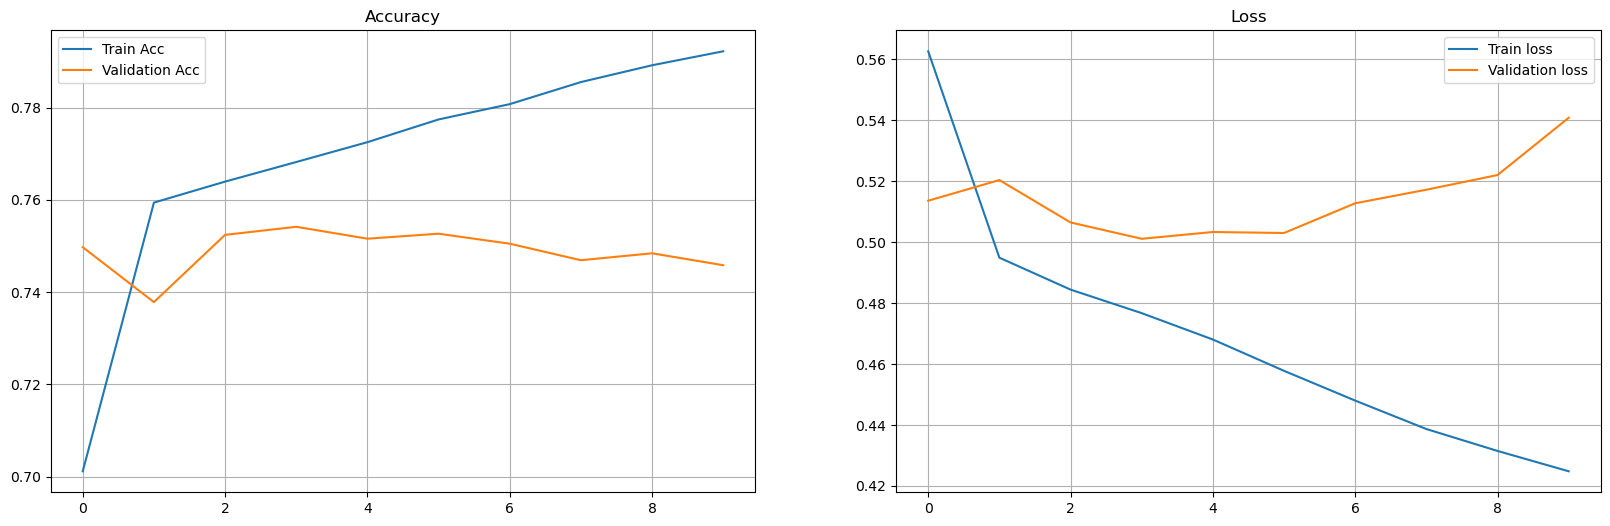

In [257]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('LSTM_onehot_loss_acc.png')
plt.show()


**Confusion matrix**

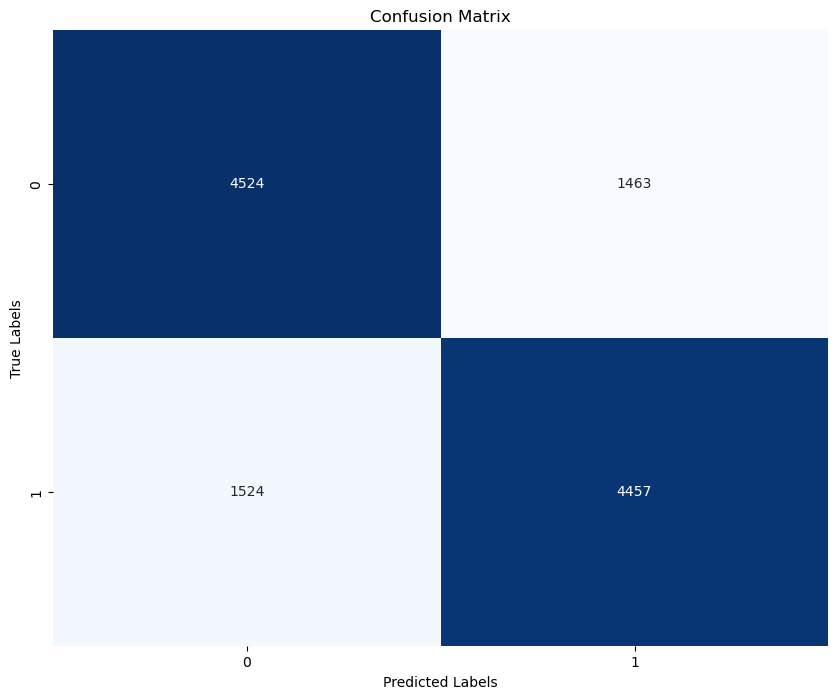

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_lstm_one.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output, hidden = model_lstm_one(inputs, h)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('LSTM_onehot_confusion.png')
plt.show()


**Classification Report**

In [259]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      5987
           1       0.75      0.75      0.75      5981

    accuracy                           0.75     11968
   macro avg       0.75      0.75      0.75     11968
weighted avg       0.75      0.75      0.75     11968



# Lstm - GloVe embedding

**Model**

In [260]:
class SentimentLSTM_glove(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentLSTM_glove,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_weights))
        #self.embedding.weight.requires_grad = False
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.5)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


In [261]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 100
output_dim = 1
hidden_dim = 150


model_lstm_glove = SentimentLSTM_glove(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model_lstm_glove.to(device)

print(model_lstm_glove)

SentimentLSTM_glove(
  (embedding): Embedding(2005, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [262]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_lstm_glove.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [263]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_lstm_glove.train()
    # initialize hidden state 
    h = model_lstm_glove.init_hidden(batch_size)
    for inputs, labels in train_loader2:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model_lstm_glove.zero_grad()
        output,h = model_lstm_glove(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_lstm_glove.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader2:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model_lstm_glove.zero_grad()
        y_pred,h = model_lstm_glove(inputs,h)


    val_h = model_lstm_glove.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model_lstm_glove.eval()
    for inputs, labels in valid_loader2:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model_lstm_glove(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader2.dataset)
    epoch_val_acc = val_acc/len(valid_loader2.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_lstm_glove.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.5197099030358451 val_loss : 0.506518522048379
train_accuracy : 74.6375 val_accuracy : 75.5
Validation loss decreased (inf --> 0.506519).  Saving model ...
Epoch 2
train_loss : 0.4775425205230713 val_loss : 0.5156505566867278
train_accuracy : 77.05357142857143 val_accuracy : 74.89166666666667
Epoch 3
train_loss : 0.4697440998894828 val_loss : 0.5081118351635449
train_accuracy : 77.37321428571428 val_accuracy : 75.26666666666667
Epoch 4
train_loss : 0.4636116320746286 val_loss : 0.5163229152480548
train_accuracy : 77.78392857142858 val_accuracy : 75.21666666666667
Epoch 5
train_loss : 0.4574540770053864 val_loss : 0.511718156822225
train_accuracy : 78.075 val_accuracy : 75.24166666666666
Epoch 6
train_loss : 0.45251126316615514 val_loss : 0.5145795997132592
train_accuracy : 78.37321428571428 val_accuracy : 74.99166666666667
Epoch 7
train_loss : 0.4483999105181013 val_loss : 0.5210446401394625
train_accuracy : 78.6392857142857 val_accuracy : 74.97500000000001
Epoch 

**Plot**

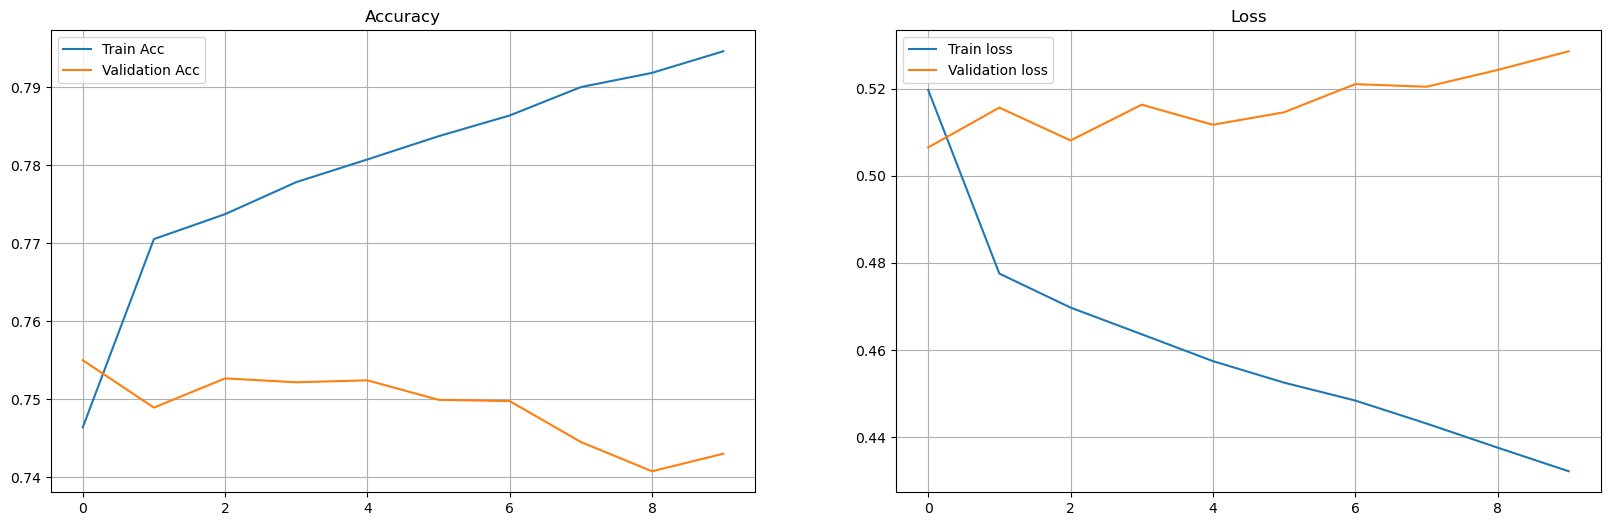

In [264]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('LSTM_glove_loss_acc.png')
plt.show()


**Confusion matrix**

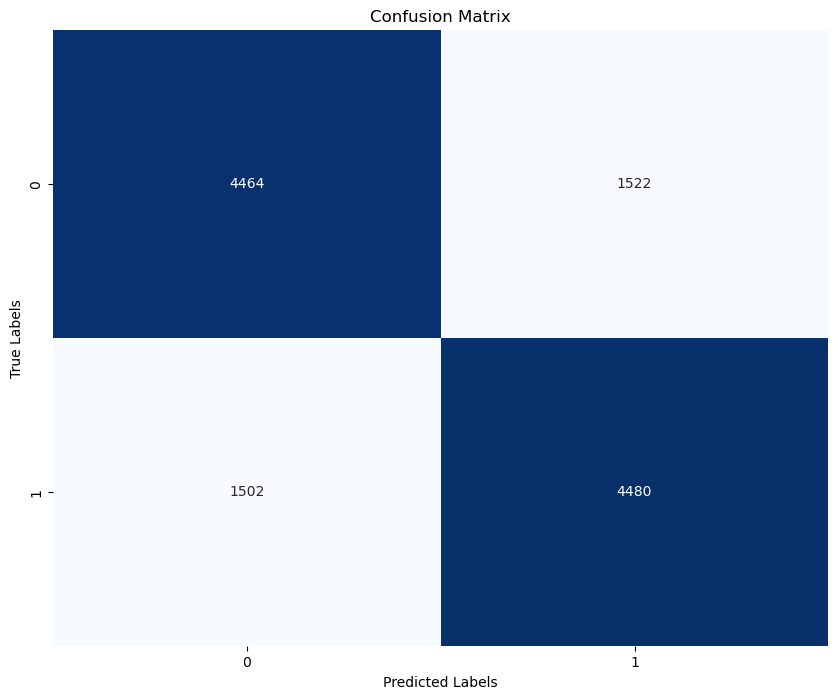

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_lstm_glove.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader2:
        inputs, labels = inputs.to(device), labels.to(device)
        output, hidden = model_lstm_glove(inputs, h)        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('LSTM_glove_confusion.png')
plt.show()


**Classification Report**

In [266]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5986
           1       0.75      0.75      0.75      5982

    accuracy                           0.75     11968
   macro avg       0.75      0.75      0.75     11968
weighted avg       0.75      0.75      0.75     11968



## GRU - One hot encodding

**Model**

In [267]:
class SentimentGRU(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5):
        super(SentimentGRU, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and GRU layers
        self.linear = nn.Linear(vocab_size, embedding_dim)
        
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=no_layers, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.to(self.linear.weight.dtype)

        # embeddings and gru_out
        embeds = self.linear(x)  # shape: B x S x Feature   since batch = True
        gru_out, hidden = self.gru(embeds)
        
        gru_out = gru_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(gru_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create a new tensor with size n_layers x batch_size x hidden_dim,
        # initialized to zero, for the hidden state of GRU
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        hidden = h0
        return hidden


In [268]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 100
output_dim = 1
hidden_dim = 150


model_gru = SentimentGRU(no_layers,vocab_size-4,hidden_dim,embedding_dim,output_dim,drop_prob=0.5)

#moving to gpu
model_gru.to(device)

print(model_gru)

SentimentGRU(
  (linear): Linear(in_features=2001, out_features=100, bias=True)
  (gru): GRU(100, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [269]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_gru.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [270]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_gru.train()
    # initialize hidden state 
    h = model_gru.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model_gru.zero_grad()
        output,h = model_gru(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model_gru.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model_gru.zero_grad()
        y_pred,h = model_gru(inputs,h)


    val_h = model_gru.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model_gru.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model_gru(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_gru.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model_gru ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.560032045670918 val_loss : 0.5152603456362046
train_accuracy : 70.23214285714286 val_accuracy : 74.60833333333333
Validation loss decreased (inf --> 0.515260).  Saving model_gru ...
Epoch 2
train_loss : 0.4950653523717608 val_loss : 0.510996550321579
train_accuracy : 75.91250000000001 val_accuracy : 74.675
Validation loss decreased (0.515260 --> 0.510997).  Saving model_gru ...
Epoch 3
train_loss : 0.4844627180099487 val_loss : 0.5059617321121501
train_accuracy : 76.44642857142857 val_accuracy : 75.31666666666666
Validation loss decreased (0.510997 --> 0.505962).  Saving model_gru ...
Epoch 4
train_loss : 0.4770699194499424 val_loss : 0.5023857779043881
train_accuracy : 76.93928571428572 val_accuracy : 75.34166666666667
Validation loss decreased (0.505962 --> 0.502386).  Saving model_gru ...
Epoch 5
train_loss : 0.469217641047069 val_loss : 0.5003392141770552
train_accuracy : 77.34464285714286 val_accuracy : 75.1
Validation loss decreased (0.502386 --> 0.500339).

**Plot**

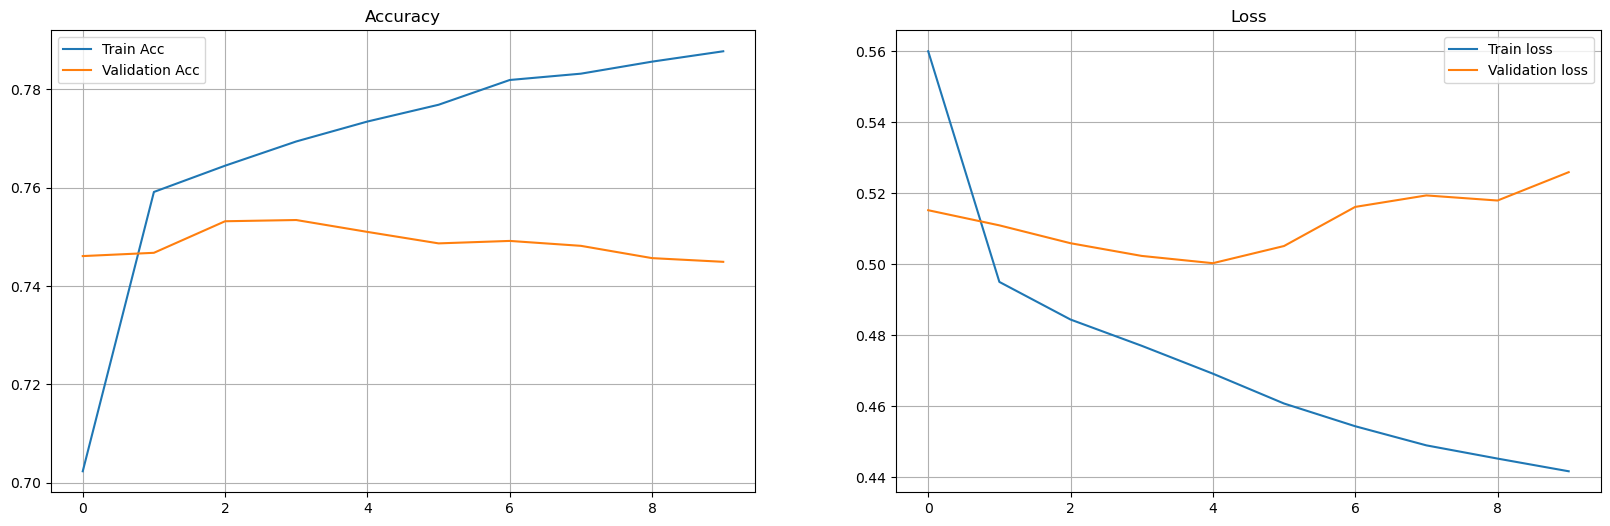

In [271]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('GRU_onehot_loss_acc.png')
plt.show()


**Confusion matrix**

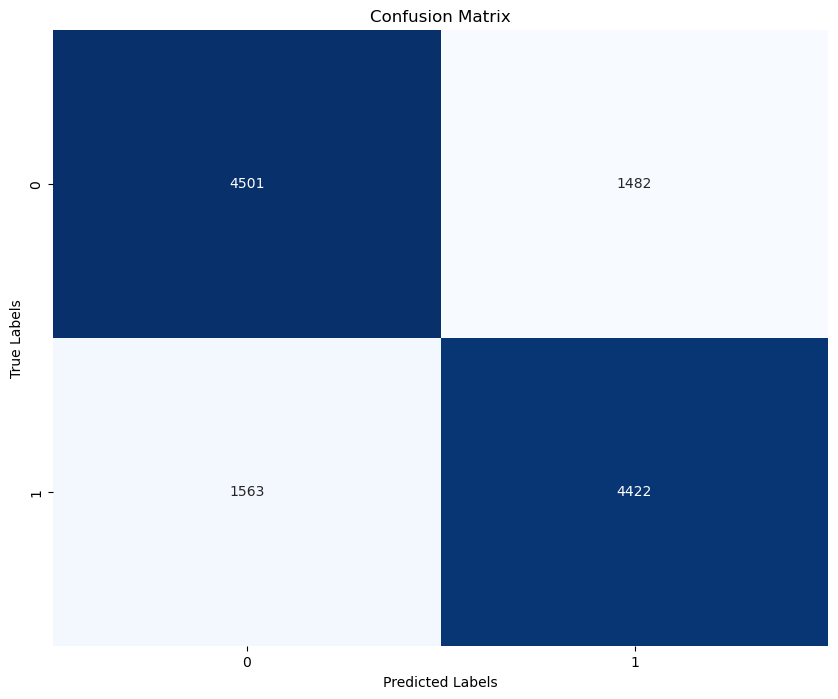

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_gru.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        output, hidden = model_gru(inputs, h)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('GRU_onehot_confusion.png')
plt.show()


**Classification Report**

In [273]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5983
           1       0.75      0.74      0.74      5985

    accuracy                           0.75     11968
   macro avg       0.75      0.75      0.75     11968
weighted avg       0.75      0.75      0.75     11968



# GRU - GloVe embedding

**Model**

In [275]:
class SentimentGRU_glove(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentGRU_glove, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
    
        # embedding and GRU layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_weights))
        #self.embedding.weight.requires_grad = False       
        
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=no_layers, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
    
    def forward(self, x, hidden):
        batch_size = x.size(0)
        #print('x-shape:',x.shape)
        # embeddings and gru_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print('embeds-shape:',embeds.shape)
        gru_out, hidden = self.gru(embeds)
        #print('gru_out-shape:',gru_out.shape)
        #print('gru-last: ',hidden[-1].shape)
        #gru_out = gru_out.contiguous().view(-1, self.hidden_dim) 
        #print('gru_out2-shape:',gru_out.shape)
        # dropout and fully connected layer
        gru_out = gru_out[:,-1,:]
        out = self.dropout(gru_out)
        #out = self.dropout(hidden[-1])
        out = self.fc(out)
        #print('out:',out.shape)
        # sigmoid function
        
        sig_out = self.sig(out)
        #print('sig:',sig_out.shape)
        
        sig_out = sig_out.view(batch_size, -1)
        #print('sig1:',sig_out.shape)
        
        sig_out = sig_out[:, -1]
        #print('sig2:',sig_out.shape)

        #softmax_out = F.softmax(out, dim=0)
        #print('x-shape:',softmax_out.shape)
        # reshape to be batch_size first
        #softmax_out = softmax_out.view(batch_size, -1)
        #print('softmax2_out:',softmax_out.shape)
        #softmax_out = softmax_out[:, -1] # get last batch of labels
       # print('softmax3_out:',softmax_out.shape)
        #print('softmax:',softmax_out )
        #a, predicted_labels = torch.max(softmax_out, dim=1)
        #print('predict: ',predicted_labels)
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create a new tensor with size n_layers x batch_size x hidden_dim,
        # initialized to zero, for the hidden state of GRU
        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        hidden = h0
        return hidden


In [277]:
no_layers = 1
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 100
output_dim = 1
hidden_dim = 150


model_gru_glove = SentimentGRU_glove(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model_gru_glove.to(device)

print(model_gru_glove)

SentimentGRU_glove(
  (embedding): Embedding(2005, 100)
  (gru): GRU(100, 150, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=150, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [278]:
# loss and optimization functions
lr=0.0003

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model_gru_glove.parameters(), lr=lr)
# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

**Training**

In [279]:
clip = 5
epochs = 10
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model_gru_glove.train()
    # initialize hidden state 
    h = model_gru_glove.init_hidden(batch_size)
    for inputs, labels in train_loader2:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        
        model_gru_glove.zero_grad()
        output,h = model_gru_glove(inputs,h)
        #print('output:',output)
        #print('label:',labels)
        # calculate the loss and perform backprop
        #labels = labels.float().requires_grad_(True)

        #print("in train:", output.dtype)
        #print('label: ', labels.dtype)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        #n.utils.clip_grad_norm_(model_gru_glove.parameters(), clip)
        optimizer.step()
        
    for inputs, labels in valid_loader2:

        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model_gru_glove.zero_grad()
        y_pred,h = model_gru_glove(inputs,h)


    val_h = model_gru_glove.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model_gru_glove.eval()
    for inputs, labels in valid_loader2:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
                
            output, val_h = model_gru_glove(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())
            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader2.dataset)
    epoch_val_acc = val_acc/len(valid_loader2.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model_gru_glove.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model_gru ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')
    

Epoch 1
train_loss : 0.49821338391304015 val_loss : 0.5087064753241718
train_accuracy : 75.75892857142857 val_accuracy : 75.23333333333333
Validation loss decreased (inf --> 0.508706).  Saving model_gru ...
Epoch 2
train_loss : 0.4641271975381034 val_loss : 0.5122679573966857
train_accuracy : 77.81428571428572 val_accuracy : 75.33333333333333
Epoch 3
train_loss : 0.45275205162593296 val_loss : 0.5172036943588665
train_accuracy : 78.5 val_accuracy : 74.85833333333333
Epoch 4
train_loss : 0.44465085566043855 val_loss : 0.5212063062637248
train_accuracy : 78.82142857142857 val_accuracy : 74.8
Epoch 5
train_loss : 0.4382599962779454 val_loss : 0.525165674680057
train_accuracy : 79.22321428571428 val_accuracy : 74.725
Epoch 6
train_loss : 0.4340170203958239 val_loss : 0.5306860874680912
train_accuracy : 79.47321428571429 val_accuracy : 74.25
Epoch 7
train_loss : 0.42796446120738985 val_loss : 0.5333231520206533
train_accuracy : 79.79642857142856 val_accuracy : 73.83333333333333
Epoch 8
trai

**Plot**

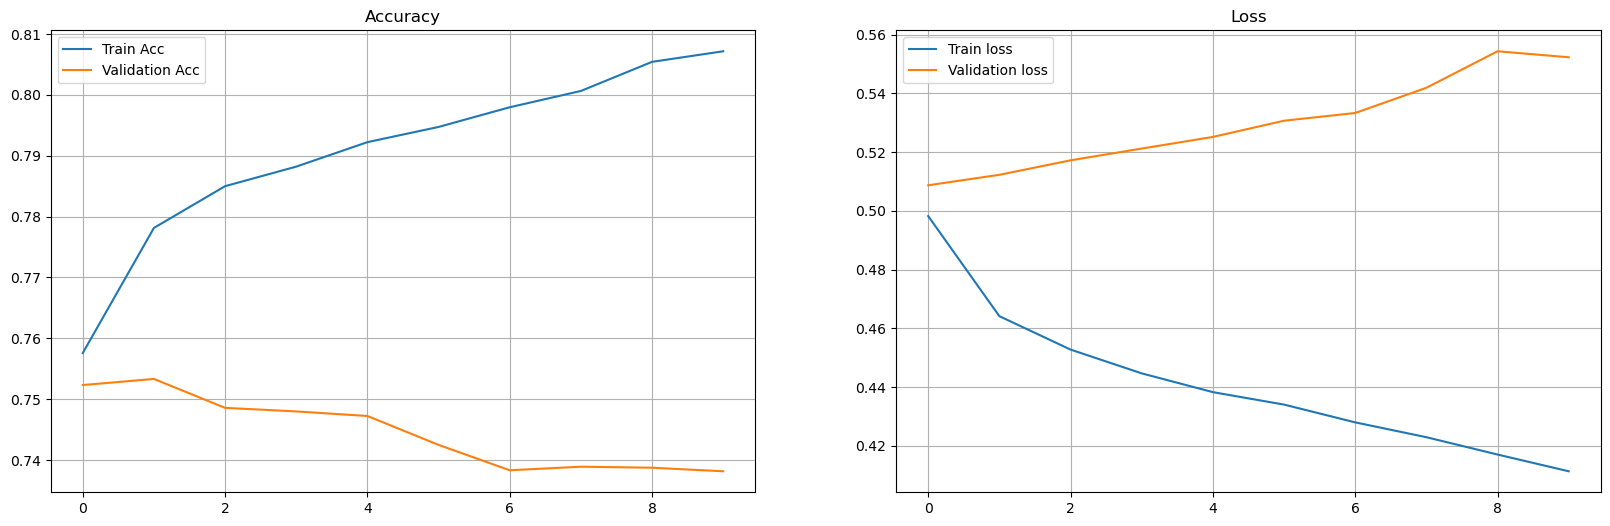

In [280]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('GRU_glove_loss_acc.png')
plt.show()


**Confusion matrix**

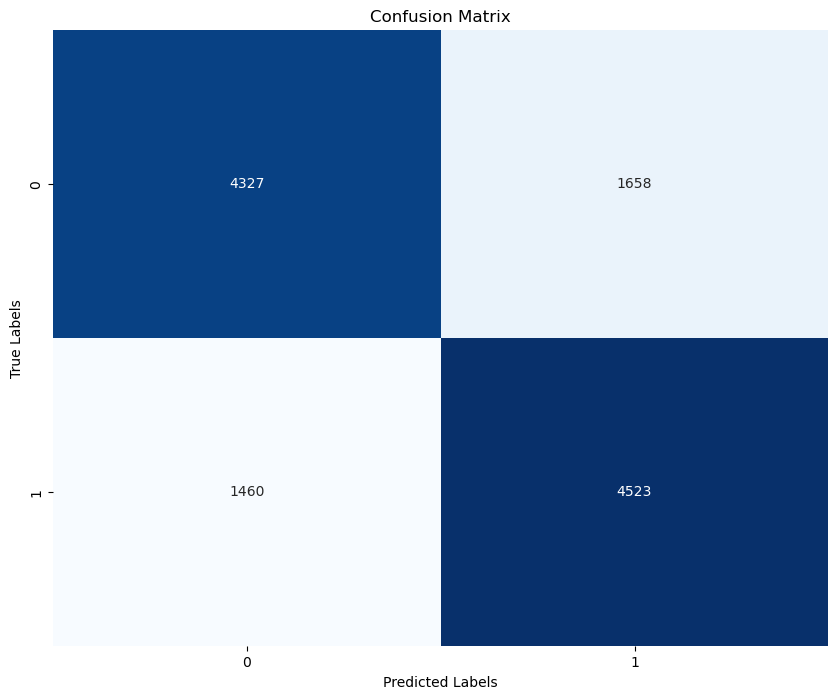

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test dataset and get predicted labels
model_gru_glove.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader2:
        inputs, labels = inputs.to(device), labels.to(device)
        output, hidden = model_gru_glove(inputs, h)
        #_, predicted = torch.max(output, dim=1)
        predicted = torch.round(output.squeeze())

        predicted_labels.extend(predicted.cpu().numpy().tolist())
        true_labels.extend(labels.cpu().numpy().tolist())

# Convert the predicted and true labels to NumPy arrays
predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('GRU_glove_confusion.png')
plt.show()


**Classification Report**

In [282]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      5985
           1       0.73      0.76      0.74      5983

    accuracy                           0.74     11968
   macro avg       0.74      0.74      0.74     11968
weighted avg       0.74      0.74      0.74     11968

